In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving tripadvisor_review.csv to tripadvisor_review (3).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['tripadvisor_review.csv']))

In [ ]:
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [ ]:
import matplotlib.pyplot as plt

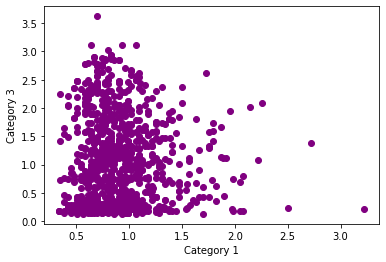

In [ ]:
X = df[["Category 1", "Category 3"]]
plt.scatter(X["Category 1"], X["Category 3"], c="purple")
plt.xlabel("Category 1")
plt.ylabel("Category 3")
plt.show()


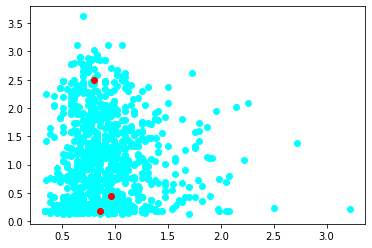

In [ ]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(X["Category 1"], X["Category 3"], c="cyan")
plt.scatter(Centroids["Category 1"], Centroids["Category 3"], c="red")
plt.show()

In [ ]:
Centroids

,Category 1,Category 3
382,0.86,0.19
456,0.96,0.45
785,0.80,2.49


In [ ]:
from math import sqrt
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Category 1"]-row_d["Category 1"])**2
            d2 = (row_c["Category 3"]-row_d["Category 3"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Category 3", "Category 1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Category 3'] - Centroids['Category 3']).sum() + (Centroids_new['Category 1'] - Centroids['Category 1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Category 3","Category 1"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.40477823940244195
0.22729493701790904
0.11415580294788008
0.1071745598648024
0.10087017315868169
0.05819757925322572
0.06411849380041884
0.06058628815046463
0.03943233626563991
0.04730724848402046
0.04517040255781257
0.02486111630533211
0.01586866024143435
0.022104517604879748
0.023573232496018948
0.011457347272516738
0.012861864407230028
0.0068439680387534785
0.0105319535565922
0.0036587434224594206
0.0029096648257289637
0.003996056864324804
0.0


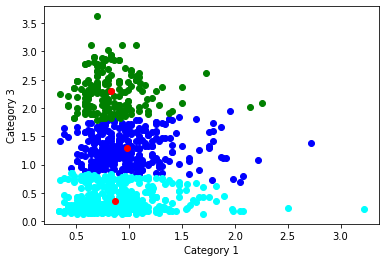

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Category 1"],data["Category 3"],c=color[k])
plt.scatter(Centroids["Category 1"],Centroids["Category 3"],c='red')
plt.xlabel('Category 1')
plt.ylabel('Category 3')
plt.show()
#https://www.kaggle.com/code/surajiiitm/k-means-clustering-in-python-from-scratch